In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dynamiqs as dq
import torch
import matplotlib.pyplot as plt

In [22]:
a = dq.destroy(30)

kappas = torch.tensor([1.0, 2.0, 3.0, 4.0]) ** 0.5
H = 0 * a
L = kappas[:, None, None] * a.repeat(len(kappas), 1, 1)

In [42]:
time = torch.linspace(0, 3.0, 100)
rho0 = dq.coherent(30, 5.0)
result = dq.mesolve(
    H, [L], rho0, time, options=dict(verbose=True), exp_ops=[dq.dag(a) @ a]
)

|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% - time 00:00/00:00


In [43]:
result.expects.shape

torch.Size([4, 1, 100])

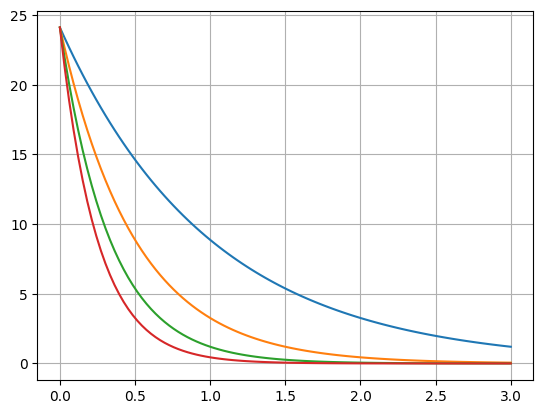

In [44]:
plt.plot(time.numpy(), result.expects[:, 0].numpy().T.real)
plt.grid()

In [67]:
import sympy as sy
from sympy.abc import a, b

In [68]:
t = sy.symbols("t", real=True)
z = sy.Function('z')(t)
y = sy.Function('y')(t)
a = sy.Function('a')(t)

In [69]:
tmp = sy.diff((z + 1j * y) / sy.sqrt(z**2 + y**2), t).simplify()
tmp

(-(1.0*I*y(t) + z(t))*(y(t)*Derivative(y(t), t) + z(t)*Derivative(z(t), t)) + (1.0*I*Derivative(y(t), t) + Derivative(z(t), t))*(y(t)**2 + z(t)**2))/(y(t)**2 + z(t)**2)**(3/2)

In [72]:
tmp = tmp.subs(sy.diff(z, t), a * y + b * z)
tmp = tmp.subs(sy.diff(y, t), -a * z + b * y)
tmp.expand().simplify()

1.0*(y(t)**3 - I*y(t)**2*z(t) + y(t)*z(t)**2 - I*z(t)**3)*a(t)/(y(t)**2 + z(t)**2)**(3/2)

In [64]:
((y**2 + z**2) * (y - 1j * z)).expand()

y(t)**3 - 1.0*I*y(t)**2*z(t) + y(t)*z(t)**2 - 1.0*I*z(t)**3

In [66]:
((z - 1j * y) * 1j).expand()

1.0*y(t) + 1.0*I*z(t)